<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')

#### What are the number of rows and columns?

In [3]:
movies.shape

(979, 6)

#### What are the data types of each column?

In [4]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [5]:
print('The average movie duration for those listed is',movies['duration'].mean(axis=0), "minutes.")

The average movie duration for those listed is 120.97957099080695 minutes.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values(by=['duration'], inplace=True)
print('The shortest movie at', movies.iloc[0,4], 'minutes is:', movies.iloc[0,1],'.')
movies.sort_values(by=['duration'], inplace=True, ascending=False)
print('The longest movie at', movies.iloc[0,4], 'minutes is:', movies.iloc[0,1],'.')

The shortest movie at 64 minutes is: Freaks .
The longest movie at 242 minutes is: Hamlet .


#### Create a histogram of duration, choosing an "appropriate" number of bins.

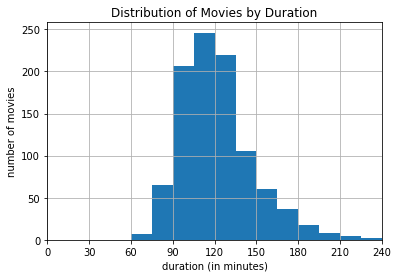

In [7]:
movies.duration.hist(bins=[0,30,45,60,75,90,105,120,135,150,165,180,195,210,225,240])
plt.xlim((0, 240))
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.title('Distribution of Movies by Duration')
plt.xlabel('duration (in minutes)')
plt.ylabel('number of movies');

#### Use a box plot to display that same data.

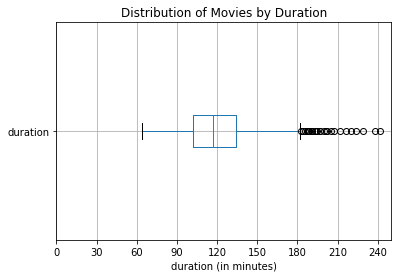

In [8]:
cols='duration'
movies.boxplot(column=cols, vert=False)
plt.xlim((0, 250))
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.xlabel('duration (in minutes)')
plt.title('Distribution of Movies by Duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

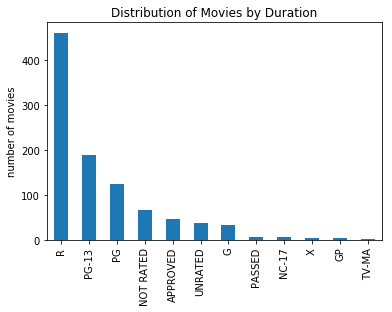

In [10]:
content_ratings = movies['content_rating'].value_counts()
content_ratings.plot.bar()
plt.title('Distribution of Movies by Duration')
plt.ylabel('number of movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True) 
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True) 
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [20]:
print('The number of entries in this number of categories is:', movies.shape)
print('The number of non-null (not missing) entries in each column is:')
movies.info()

The number of entries in this number of categories is: (979, 6)
The number of non-null (not missing) entries in each column is:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 979 entries, 476 to 389
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 93.5+ KB


In [23]:
print('The number of entries missing in each category is:')
movies.isnull().sum()

The number of entries missing in each category is:


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [24]:
print('The rows with missing data are:')
movies[movies.isna().any(axis=1)]

The rows with missing data are:


,star_rating,title,content_rating,genre,duration,actors_list
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."


In [28]:
print('I looked up the accurate data for the missing content_rating values\n in the web-version of IMDB and put them in the table:')
# "Butch Cassidy and the Sundance Kid" was rated "PG" (IMDB)
movies.iloc[187, movies.columns.get_loc('content_rating')] = 'PG'
# "Where Eagles Dare" was rated "PG" (IMDB)
movies.iloc[649, movies.columns.get_loc('content_rating')] = 'PG'
# "True Grit" (the original one) was rated "G" (IMDB)
movies.iloc[936, movies.columns.get_loc('content_rating')] = 'G'
# movies[movies.isna().any(axis=1)]
movies.iloc[[187, 649, 936]]  

I looked up the accurate data for the missing content_rating values
 in the web-version of IMDB and put them in the table:


,star_rating,title,content_rating,genre,duration,actors_list
935,7.4,Excalibur,PG,Adventure,140,"[u'Nigel Terry', u'Helen Mirren', u'Nicholas C..."
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
892,7.5,Fruitvale Station,G,Biography,85,"[u'Michael B. Jordan', u'Melonie Diaz', u'Octa..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [29]:
print('For movies 2 hours or longer, the average star rating is:', movies['star_rating'][movies['duration'] >= 120].mean(axis=0))
print('For movies under 2 hours, the average star rating is:', movies['star_rating'][movies['duration'] < 120].mean())

For movies 2 hours or longer, the average star rating is: 7.948898678414094
For movies under 2 hours, the average star rating is: 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

There appears to be a positive correlation between duration and star rating.


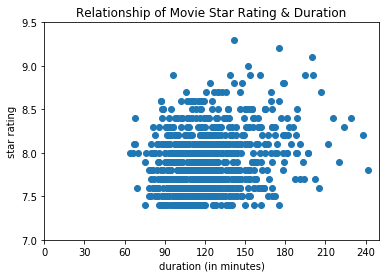

In [30]:
plt.scatter(movies['duration'], movies['star_rating']);
plt.xlim((0, 250))
plt.xticks([0,30,60,90,120,150,180,210,240])
plt.ylim((7, 9.5))
plt.yticks([7,7.5,8,8.5,9,9.5])
plt.title('Relationship of Movie Star Rating & Duration')
plt.xlabel('duration (in minutes)')
plt.ylabel('star rating');
print('There appears to be a positive correlation between duration and star rating.')

#### Calculate the average duration for each genre.

In [31]:
print('The average duration for movies by', 
      movies.groupby(['genre'])['duration'].mean())

The average duration for movies by genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64


## Advanced level

#### Visualize the relationship between content rating and duration.

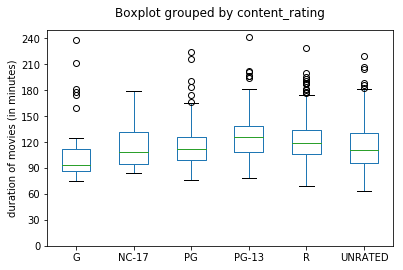

In [32]:
movies.boxplot(column='duration',by='content_rating')
plt.ylim((0, 250))
plt.yticks([0,30,60,90,120,150,180,210,240])
plt.grid(False)
plt.xlabel('')
plt.title('')
plt.ylabel('duration of movies (in minutes)');

#### Determine the top rated movie (by star rating) for each genre.

In [33]:
print('The star rating and title for each movie genre are:')
genre_max = movies.groupby(['genre']).max()
print(genre_max.loc[:,['star_rating', 'title']])

The star rating and title for each movie genre are:
           star_rating                                title
genre                                                      
Action             9.0                              Yojimbo
Adventure          8.9                            True Grit
Animation          8.6                       Wreck-It Ralph
Biography          8.9                        Walk the Line
Comedy             8.6                           Zombieland
Crime              9.3                               Zodiac
Drama              8.9                                 Zulu
Family             7.9  Willy Wonka & the Chocolate Factory
Fantasy            7.7            The City of Lost Children
Film-Noir          8.3                        The Third Man
History            8.0                  Battleship Potemkin
Horror             8.6                                [Rec]
Mystery            8.6                              Vertigo
Sci-Fi             8.2        The Day the Earth 

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [36]:
# Check to see if there are duplicates in movie's title column and show them.
movies[movies.duplicated(['title'])]
titles = movies['title']
print('There are duplications and here they are:\n', movies[titles.isin(titles[titles.duplicated()])])

# Remove duplicate rows based on values in the title column, keep the last one - and save to nodup_movies.
nodup_movies = movies.drop_duplicates('title', keep='last')

# Check to see if there are duplicates in nodup_movies. 
nodup_movies[nodup_movies.duplicated(['title'])]
titles = nodup_movies['title']
print('\nAfter duplication removal a request for duplications display an:', nodup_movies[titles.isin(titles[titles.duplicated()])])

There are duplications and here they are:
      star_rating                            title content_rating      genre  \
678          7.7                   Les Miserables          PG-13      Drama   
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit            NaN  Adventure   
905          7.5                          Dracula              R     Horror   
662          7.7                        True Grit          PG-13  Adventure   
703          7.6                          Dracula        UNRATED     Horror   

     duration                                        actors_list  
678       158  [u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi 

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies

#### Option 1: automatically create a list of relevant genres by saving the value_counts and then filtering

In [37]:
# Group the genres and get the counts for each.
genre_counts = movies['genre'].value_counts()
#print(genre_counts)
# Create an indexed filtered_list of genres filtered to keep only those with 10 or more as counts.
filtered_list = genre_counts[(genre_counts >= 10)].index
#print(filtered_list)
# Filter the full movies list for those that are listed in the filtered list, group the genres again, calculate the means of the values in the star rating column and print them.
print('The average star rating for movies with counts over 10 by genre:\n', movies[movies.genre.isin(filtered_list)].groupby('genre').star_rating.mean())

The average star rating for movies with counts over 10 by genre:
 genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 2: aggregate by count and mean, then filter using the count

In [38]:
# Group the movies by genre and calculate counts and means for star_rating.
movie_stats = movies.groupby(['genre']).star_rating.agg(['count', 'mean'])
#print(movie_stats)
# Filter the movie_stats table by count >= 10 and print out.
print('The average star rating for movies by genre with counts over 10 are:\n',movie_stats[movie_stats['count'] >= 10])

The average star rating for movies by genre with counts over 10 are:
            count      mean
genre                     
Action       136  7.884559
Adventure     75  7.933333
Animation     62  7.914516
Biography     77  7.862338
Comedy       156  7.822436
Crime        124  7.916935
Drama        278  7.902518
Horror        29  7.806897
Mystery       16  7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [41]:
print('Of all 979 movies, 969 have unique cast listings.\n But 6 have the same cast, the most of any set of actors.\nThis is the cast of the Harry Potter movies.')
movies['actors_list'].describe()

Of all 979 movies, 969 have unique cast listings.
 But 6 have the same cast, the most of any set of actors.
This is the cast of the Harry Potter movies.


count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object